딥러닝의 학습 방법의 이해를 위해 필요한 개념인 손실함수, 옵티마이저, 에포크의 개념을 정리. 

# 1. 손실함수(Loss function)

손실 함수는 실제값과 예측값의 차이를 수치화해주는 함수입니다. 이 두 값의 차이. 즉, 오차가 클 수록 손실 함수의 값은 크고 오차가 작을 수록 손실 함수의 값은 작아집니다.

- 회귀 : 평균 제곱 오차
- 분류 : 크로스 엔트로피

손실함수의 값을 최소화하는 두개의 매개변수인 가중치 w와 편향 b의 값을 찾는 것이 딥러닝의 학습 과정이므로 손실함수의 선정은 매우 중요. 

## 1) MSE(Mean Squared Error, MSE)

평균제곱오차. 연속형 변수를 예측할 때 사용. 
다음과 같이 compile의 loss에 문자열 'mse'라고 기재해 사용가능.

In [ ]:
model.compile(optimizer='adam',loss='mse',metrics=['mse'])

아래와 같이사용 가능

In [ ]:
model.compile(optimizer='adam', loss=tf.keras.losses.MeanSquaredError(), metrics=['mse'])

딥러닝 자연어 처리는 대부분 분류 문제이므로 평균 제곱 오차보다는 아래의 **크로스 엔트로피** 함수들을 주로 사용

## 2) 이진 크로스 엔트로피(Binary Cross-Entropy)

이항 교차 엔트로피라고도 부르는 손실함수이다. 출력층에서 시그모이드함수를 사용하는 **이진 분류**의 경우 binary_crossentropy를 사용한다. 

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['acc'])

In [ ]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer='adam', metrics=['acc'])

## 3) 카테고리칼 크로스 엔트로피(Categorical Cross-entropy)

범주형 교차 엔트로피라고도 불리는 손실함수. 출력층에서 소프트맥스 함수를 사용하는 다중 클래스 분류일 경우 사용한다. 

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['acc'])

In [ ]:
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(), optimizer='adam', metrics=['acc'])

만약 레이블에 대해서 원-핫인코딩을 생략하고 정수값을 가진 레이블에 대해서 다중 클래스 분류를 수행하고 싶다면 'sparse_categorical_crossentropy'를 사용. 

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['acc'])

In [ ]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer='adam', metrics=['acc'])

## 4) 그 외에 다양한 손실 함수들
아래의 텐서플로우 공식 문서 링크에서 방금 언급하지 않은 손실 함수 외에도 다양한 손실 함수들을 확인할 수 있습니다.

https://www.tensorflow.org/api_docs/python/tf/keras/losses

지금까지 자주 사용하는 손실 함수 몇 가지에 대해서 정리해봤습니다. 위 compile 코드에서 optimizer='adam' 이라는 부분에 주목해봅시다. 이는 아담이라는 옵티마이저를 사용했다라는 의미입니다. 손실 함수의 선정만큼이나 옵티마이저의 선정 또한 중요합니다. 이어서 옵티마이저에 대해서 정리해봅시다.

# 2. 배치 크기(Batch Size)에 따른 경사 하강법

손실함수의 값을 줄여나가며 학습하는 방법은 어떤 옵티마이저를 사용하느냐에 따라 달라진다. 여기서 배치(batch)는 가중치 등의 매개변수의 값을 조정하기 위해 사용하는 데이터의 양을 말한다. 
전체 데이터를 가지고 매개변수의 값을 조정할 수도 있고, 정해준 양의 데이터만 가지고도 매개변수의 값을 조정할 수 있다. 

## 1) 배치 경사 하강법(Batch Gradient Descent)

- 가장 기본적인 경사하강법
- 오차를 구할 떄 전체 데이터를 고려.
- 딥러닝에서는 전체 데이터에 대한 한번의 훈련횟수를 1 에포크라고 하는데 배치 경사 하강법은 한번에 에포크에 모든 매개변수 업데이트를 단 한번 수행.
- 한번의 매개변수 업데이트에 시간이 오래 걸림.
- 메모리를 크게 요구. 

In [ ]:
model.fit(X_train,y_train,batch_size=len(X_train))

## 2) 배치 크기가 1인 확률적 경사 하강법(Stochastic Gradient Descent,SGD)

배치 경사 하강법은 시간이 너무 오래걸림. 배치 크기가 1인 확률적 경사 하강법은 매개변수 값을 조정 시 전체 데이터가 아니라 랜덤으로 선택한 하나의 데이터에 대해서만 계산

In [ ]:
model.fit(X_train, y_train, batch_size=1)

## 3) 미니 배치 경사 하강법(Mini-Batch Gradient Descent)

배치 크기를 지정하여 해당 데이터 개수만큼에 대해 계산해 매개변수의 값을 조정하는 경사하강법.

빠르고, SGD보다 안정적. 
배치 크기는 일반적으로 2의 n제곱에 해당하는 숫자로 선택하는 것이 보편적. 별도로 지정해주지 않으면 2의 5제곱에 해당하는 숫자로 설정. 

In [ ]:
model.fit(X_train, y_train, batch_size=128)

# 3. 옵티마이저(optimizer)

## 1) 모멘텀(Momentum)

물리학 법칙. 모멘텀 경사 하강법에 관성을 더해줌. 모멘텀은 경사 하강법에서 계산된 접선의 기울기에 한 시점 전의 접선의 기울기값을 일정한 비율만큼 반영합니다. 이렇게 하면 마치 언덕에서 공이 내려올 때, 중간에 작은 웅덩이에 빠지더라도 관성의 힘으로 넘어서는 효과를 줄 수 있습니다.

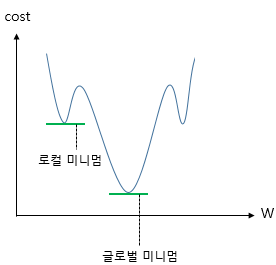

전체 함수에 걸쳐 최소값을 글로벌 미니멈(Global Minimum) 이라고 하고, 글로벌 미니멈이 아닌 특정 구역에서의 최소값인 로컬 미니멈(Local Minimum) 이라고 합니다. 로컬 미니멈에 도달하였을 때 글로벌 미니멈으로 잘못 인식하여 탈출하지 못하였을 상황에서 모멘텀. 즉, 관성의 힘을 빌리면 값이 조절되면서 현재의 로컬 미니멈에서 탈출하고 글로벌 미니멈 내지는 더 낮은 로컬 미니멈으로 갈 수 있는 효과를 얻을 수도 있습니다.

In [ ]:
tf.keras.optimizers.SGD(lr=0.01, momentum=0.9)

## 2) 아다그라드(Adagrad)

모든 매개변수에 동일한 학습률(learning rate)을 적용하는 것은 비효율적입니다. 아다그라드는 각 매개변수에 서로 다른 학습률을 적용시킵니다. 이때 변화가 많은 매개변수는 학습률이 작게 설정되고 변화가 적은 매개변수는 학습률을 높게 설정시킵니다.

In [ ]:
tf.keras.optimizers.Adagrad(lr=0.01,epsilon=1e-6)

## 3) RMSprop

Adagrad는 학습을 계속 진행한 경우에는 나중에 가서는 학습률이 지나치게 떨어진다는 단점이 있다. 이를 다른 수식으로 대체해 단점을 개선했다. 

In [ ]:
tf.keras.optimizers.RMSprop(lr=0.001,rho=0.9,epsilon=1e-06)

## 4) 아담(Adam)

RMSprop와 모멘텀 두가지를 합친 방법. 방향과 학습률 두가지를 모두 잡음. 

In [ ]:
tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

## 5) 사용 방법

옵티마이저 인스턴스는 compile의 optimizer에서 호출한다. 

In [ ]:
adam = tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['acc'])

In [ ]:
#걍 단순히 문자열로 'adam'으로 작성해도 동작함. 다른것들도 마찬가지

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])